# Simulating Force Fields

Let's consider that we're told to modify our asteroids game so that  the spaceship and the asteroids feel a *gravitational pull* towards the center of the screen as if a black holde was placed there.

This give us a mathematical challenge and a playground to understand force fields.

Gravity is a familiar example of a force that acts at a distance &mdash; gravity doesn't need to touch an object to make it feel the gravitational pull. Magnetism and static electricity are other familiar forces that act at a distance.

In physics, we pictures sources of these kinds of forces as generating invisible force fields around themselves. Anywhere in the Earth's gravitational force field, an object will feel a pull towards the Earth.

Once we add a gravitational field towards the center of the screen for our asteroids game, we'll cover the math behind it in more general terms.

Namely, force fields are modeled with mathematical functions called vector fields. Vector fields oftent arise as outputs from a calculus operation called the *gradient*, which is a key tool in the machine learning examples.

## Modeling gravity with a vector field

A vector field is an assignment of a vector at every point in space.

A *gravitational field* is a vector field telling us how strongly gravity pulls and in what direction from any given point.

The vector field can be easily visualized by picking a bunch of points and drawing the vector assigned to each point as an arrow starting from that point.

![Force field](pics/force-field.png)

Note how this depiction agrees with our intuition about gravity &mdash; all the arrows point towards the center point (where the black hole is supposed to be), and the closer to the black hole, the pull will be stronger.

The first that we'll do is model the gravitational field as a function that will take a point in space and will tell us the magnitude and direction of the force an object would feel at that point.

In our particular case, the 2D vector field function will take a 2D vector representing a point and will return a 2D vector that is the force at that point.

Once we've built that function, we will be ready to add it to our asteroids game, where we will see how the spaceship and asteroids accelerate depending on their location, in the direction of the black hole.

### Modeling gravity with a potential energy function

An equivalent mental model for force at a distance is the one we would use for the potential energy. You can think of potential energy as stored energy, ready to be converted into motion.

For example, a bow and an arrow have no potential energy in the first position:

![No potential energy](pics/bow-no-potential-energy.png)

But as soon as you stretch the bow it gains potential energy that can be converted into motion if the bow is released:

![Bow with potential energy](pics/bow-with-potential-energy.png)

We'll model potential energy as another Python function, taking the 2D position vector of an object in the game world and returning a number measuring its potential energy at that point.

An assignment of a number (instead of a vector) to every point in space is called a *scalar field*.

Scalar maps are typically visualized using a heatmap chart, which uses darker and brighter colors to show how the value of a scalar field changes over a 2D space:

![heatmap](pics/heatmap.png)

As the chart shows, the further away from the black hole, the brighter the colors get, meaning the potential energy is greater.

The scalar field representing potential energy is a different mathematical model than the vector field representing the gravitational force, but they represent the same physics: the further you pull the spaceship from the black hole, the more potential energy it has, the less gravitational pull it feels, and the faster the spaceship would move.

As it happens, both the scalar and the vector field are connected by an operation called the gradient.

The gradient of a scalar field is a vector field, which tells us the direction and magnitude of the steepest increase in the scalar field.

In our example, potential energy increases as you move away from the black hole, so the gradient, so the gradient of potential energy is a vector field pointing outward at every point.

The following picture results from superimposing the gradient vector field on the potential energy heatmap:

![gradient](pics/gradient.png)

See how the gradient points in the direction that the potential energy increases, and that the resulting vector field looks similar to the gravitational field of the black hole, except the arrows point in the opposite directions and the magnitudes are reversed. That is, to get the gravitational field from a potential energy function, we just need to take the gradient and then reverse the directions of the force field vectors by adding a minus sign.

## Modeling gravitational fields

A vector field is an assignment of a vector to every point in a space.

In our asteroids game, we will model a gravitational force vector for every location in our game. We will look at 2D vector fields that assign 2D vectors to every point in a 2D space.

This means that we will start by writing Python functions that take 2D vectors as input and return 2D vector as output. Then, we'll write code to add a black hole to the asteroids game. For the purpose of the game, a black hole will be a black circle that exerts an attractive force on all objects around it, as depicted in the following picture:

![Asteroids black hole](./pics/asteroids-black-hole.png)

### Defining a vector field

A vector field in the 2D plane is a function $ \vec{F}(x, y) $ that takes the coordinates $ x $ and $ y $ of a vector and returns another 2D vector that is the value of the vector field at the point $ (x, y) $.

The notation $ \vec{F} $ for a function indicates that $ F $ is a vector valued function, that is, its return values are vectors.

When dealing with vector fields, it's quite common to represent the inputs as points, and the outputs as arrows:

![Vector valued functions](pics/vector-valued-functions.png)

Because of what it means a vector field (an assignment of a vector to every point in a space), it's usual to draw the output vector as an arrow starting from the point in the plane that is passed as an input to the function.

For the example above, it will be:

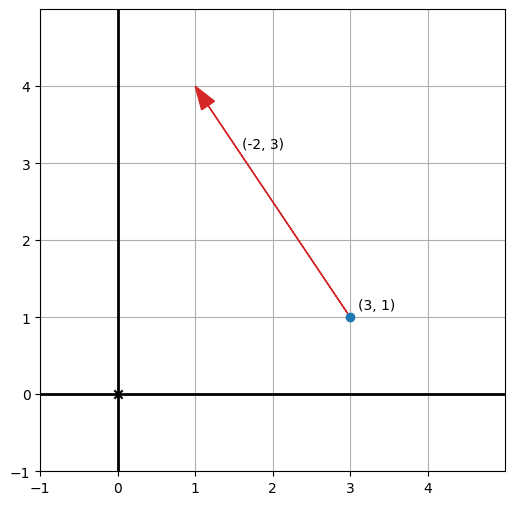

In [9]:
from vec2d.graph import Arrow, Points, Colors, draw, Annotation
from vec2d.math import add

input_point = (3, 1)
assigned_vector = (-2, 3)

draw(
    Arrow(add(input_point, assigned_vector), input_point, color=Colors.RED),
    Points(input_point, color=Colors.BLUE),
    Annotation(tip=(3.1, 1.1), text=f"{input_point}", arrowstyle=None),
    Annotation(tip=(1.6, 3.2), text=f"{assigned_vector}", arrowstyle=None),
)

If you calculate several values of $ F $, you can start to picture the vector field by drawing a number of arrows attached to points at once.

The following picture shows three more points: $ (-2, 2) $, $ (-1, -2) $, and $ (3, -2) $ with arrows attached to them representing the values of $ F $ at the points, with $ F $ being $ \vec{F}(x, y) = (-2y, x) $:

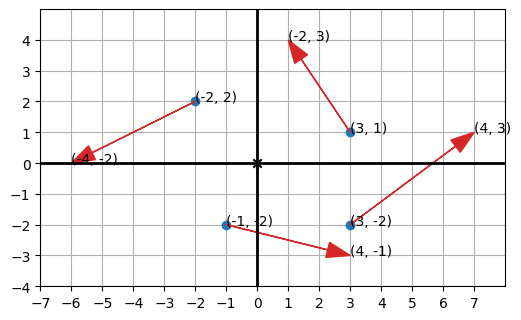

In [10]:
from vec2d.graph import Arrow, Points, Colors, draw, Annotation
from vec2d.math import add

def f(x, y):
    return (-2 * y, x)

input_points = [(3, 1), (-2, 2), (-1, -2), (3, -2)]

draw(
    Points(*input_points, color=Colors.BLUE),
    *[Arrow(add(point, f(*point)), point, color=Colors.RED) for point in input_points],
    *[Annotation(tip=add(point, f(*point)), text=f"{f(*point)}", arrowstyle=None) for point in input_points],
    *[Annotation(tip=point, text=f"{point}", arrowstyle=None) for point in input_points]
)

if we try to draw more arrows, they start to overlap and the diagram becomes illegible. To prevent this, it's quite common to scale down the lengths of vectors by a constant factor.

The function `plot_vector_field` does the trick:

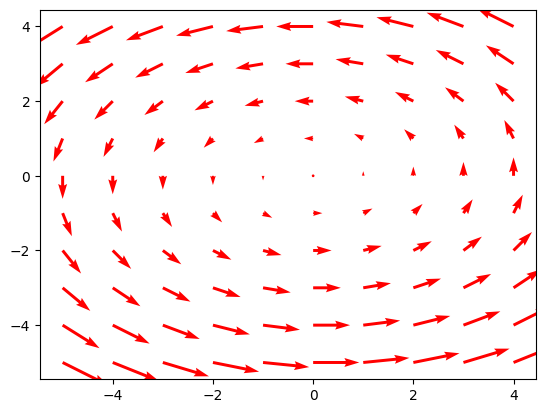

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_field(f, xmin, xmax, ymin, ymax, xtep=1, ystep=1):
    X, Y = np.meshgrid(np.arange(xmin, xmax, xtep), np.arange(ymin, ymax, ystep))
    U, V = f(X, Y)
    # same as:
    # U = np.vectorize(lambda x, y: f(x, y)[0])(X, Y)
    # V = np.vectorize(lambda x, y: f(x, y)[1])(X, Y)
    plt.quiver(X, Y, U, V, color='red')


def f(x, y):
    return (-2 * y, x)

plot_vector_field(f, -5, 5, -5, 5)

### Defining a simple force field

Let's focus on building a simplified model of gravity. The gravitational force becomes stronger when you get closer to it source. For example, the sun has stronger gravity than the Earth, but as we are much closer to the Earth, we only feel the Earth's gravity.

For simplicity, we won't use a realistic gravitational field, and instead we will model it as $ \vec{F}(\ver{r}) = -\vec{r} $, that is, $ \vec{F}(x, y) = (-x, -y) $.

We can plot it to see what it looks like:

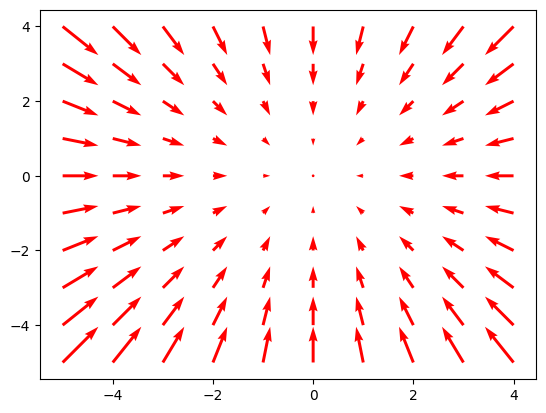

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_field(f, xmin, xmax, ymin, ymax, xtep=1, ystep=1):
    X, Y = np.meshgrid(np.arange(xmin, xmax, xtep), np.arange(ymin, ymax, ystep))
    U, V = f(X, Y)
    plt.quiver(X, Y, U, V, color='red')


def f(x, y):
    return (-x, -y)

plot_vector_field(f, -5, 5, -5, 5)

This is not exactly like a gravitational field, because although it points towards the origin everywhere as we expect, it gets stronger as you go further away instead of weaker.

However, this satisfies what we need for our asteroids game, because it guaranteeds that we can't have a simulated object reaching the escape velocity and disappearing from view &mdash; the object will be pulled back towards the origin.

## Adding gravity to the asteroid game

The black hole in our game can be represented as a polygon with 20 vertices at equal distances, so it will be approximately circular.

We specify the strength of the gravitational pull by one number, which we will call gravity and that we will need to supply when instantiating the black hole:

```python
class BlackHole(PolygonModel):

    def __init__(self, gravity) -> None:
        vertices = [to_cartesian((0.5, 2 * pi * n / 20)) for n in range(20)]
        super().__init__(vertices)
        self.gravity = gravity
```

The 20 vertices are all 0.5 units from the origina at equally spaces angles.

We can instantiate the black hole using:

```python
black_hole = BlackHole(0.1)
```

Additionally, we will enhance the existing `draw_poly` function, so that we can supply a `fill` parameter to create a filled polygon:

```python
def draw_poly(scr, polygon_model: PolygonModel, color=GREEN, fill=False):
    screen_pixels = [to_pixels(x, y) for x, y in polygon_model.transformed()]
    if fill:
        pygame.draw.polygon(scr, color, screen_pixels)
    else:
        pygame.draw.aalines(scr, color, True, screen_pixels)
```

We discussed that the gravitational field we'll use is:

$
\displaystyle
\vec{F}(x, y) = (-x, -y)
$

If the black hole is centered at $ (x_{bh}, y_{bh}) $, the vector field $ \vec{g}(x, y) = (x_{bh} - x, y_{bh} - y) $ points in the direction from $ (x, y) $ to $ (x_{bh}, y_{bh}) $.

To make the strength of the force field scale according to the specified gravity of the black hole, we can multiply the vectors resulting from the force field function by the gravity value, effectively resulting in the function:

```python
def gravitational_field(source, x, y):
    relative_position = (x - source.x, y - source.y)
    return scale(-source.gravity, relative_position)
```

The equivalent force field in mathematical notation would be:

$
\displaystyle
\vec{g}(x, y) = G_{bh} \cdot (x - x_{bh}, y - y_{bh})
$

where $ G_{bh} $ represents the made-up `gravity` passed when instantiating the black hole, $ x_{bh} $ and $ y_{bh} $, the black hole position (which will be $(0, 0) $ by default in our game), and $ x $ and $ y $ the position of the object that will feel the gravitational pull.

### Making game objects feel gravity

If this vector field works like a gravitational field, it will tell us the force per unit mass that an object at position $ (x, y) $ will feel.

That is, $ \vec{F}(x, y) = m \cdot \vec{g}(x, y) $.

Newton's second law of motion, states that the acceleration of an object is the net force divided by the object's mass:

$
\displaystyle
\vec{a} = \frac{F_{net}(x, y)}{m}
$

Therefore:

$
\displaystyle
\vec{a} = \frac{m \cdot \vec{g}(x, y)}{m} = \vec{g}(x, y)
$

That is, the gravitational field vector is equal to the acceleration vector caused by gravity, and the mass of the object is not relevant here.

Note that this is true for real gravitational fields, and that is why object of different masses all fall at the same rate of about 9.81 meters per second near the Earth's surface.

Back in our game, in one iteration of the game loop taking an elapsed time $ \Delta t $, the change in velocity of a spaceship or asteroid will be determined by its $ (x, y) $ coordinates as follows:

$
\displaystyle
\Delta \vec{v} = \vec{a} \cdot \Delta t = \vec{g}(x, y) \cdot \Delta t
$

We need to add the corresponding code that will update the velocity of the spaceship as well as the velocity of each asteroid in every iteration of the game loop.

One possible option is to encapsulate all of the physics into the `move()` method of the `PolygonModel`. An additional tweak we need to add is a `bounce` flag to control whether objects teleport when they get to the limits of the screen or they simply bounce. This is needed because if objects teleport they will instantly feel a different gravitational field, which will feel weird.

As a result, the new implementation of the `PolygonModel.move()` method will be:

```python
def move(self, milliseconds, thrust_vector=(0, 0), gravity_source):
    tx, ty = thrust_vector
    gx, gy = gravitational_field(gravity_source, self.x, self.y)
    ax = tx + gx
    ay = ty + gy
    self.vx += ax * milliseconds / 1000
    self.vy += ay * milliseconds / 1000

    dx, dy = (
        self.vx * milliseconds / 1000.0,
        self.vy * milliseconds / 1000.0,
    )
    self.x, self.y = add((self.x, self.y), (dx, dy))

    if self.BOUNCE:
        if self.x < self.X_MIN or self.x > self.X_MAX:
            self.vx = -self.vx
        if self.y < self.Y_MIN or self.y > self.Y_MAX:
            self.vy = -self.vy
    else:
        if self.x < self.X_MIN:
            self.x += self.X_MAX - self.X_MIN
        if self.y < self.Y_MIN:
            self.y += self.Y_MAX - self.Y_MIN
        if self.x > self.X_MAX:
            self.x -= self.X_MAX - self.X_MIN
        if self.y > self.Y_MAX:
            self.y -= self.Y_MAX - self.Y_MIN
```

The remaining task will be to update how the `move` method is being called, as it now needs more arguments than before:

```python
while not done:
    # get elapsed milliseconds since last frame
    milliseconds = clock.tick()

    # Get all events from pygame's event queue
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    # Clear the screen
    screen.fill(BLACK)

    draw_poly(screen, ship)
    draw_poly(screen, black_hole, fill=True)
    for asteroid in asteroids:
        asteroid.move(
            milliseconds, thrust_vector=(0, 0), gravity_source=black_hole
        )
        draw_poly(screen, asteroid)

    # Get the state of the keyboard keys
    keys = pygame.key.get_pressed()
    if keys[pygame.K_SPACE]:
        laser_beam = ship.laser_segment()
        draw_segment(screen, laser_beam)

        for asteroid in asteroids:
            if asteroid.does_intersect(laser_beam):
                asteroids.remove(asteroid)
        done = len(asteroids) == 0

    if keys[pygame.K_LEFT]:
        ship.rotation_angle += SHIP_ROTATION_VELOCITY * milliseconds
    if keys[pygame.K_RIGHT]:
        ship.rotation_angle -= SHIP_ROTATION_VELOCITY * milliseconds

    tx, ty = 0, 0
    if keys[pygame.K_UP]:
        tx = ACCELERATION * cos(ship.rotation_angle)
        ty = ACCELERATION * sin(ship.rotation_angle)
    if keys[pygame.K_DOWN]:
        tx = -ACCELERATION * cos(ship.rotation_angle)
        ty = -ACCELERATION * sin(ship.rotation_angle)

    ship.move(
        milliseconds, thrust_vector=(tx, ty), gravity_source=black_hole
    )
```

If you adjust the game so that there's no asteroids and only the spaceship and use no thrust and just let the spaceship move, you will see how the spaceship is attracted by the blackhole and moves like a pendulum.

![Ship's pendular movement](pics/asteroids-pendulum.png)

Note that if adjust the thrust a bit, so that the spaceship doesn't go through the blackhole you will see how the spaceship orbits around the blackhole.

![Ship's orbit](pics/asteroids-orbit.png)

### Exercise

Where do all of the vectors in the vector field $ (-2 - x, 4 - y) $ point? Plot the vector field to confirm your answer.

If we recall from our algebra in 2D chapters:

If,

$
\vec{u} + \vec{v} = \vec{w}
$


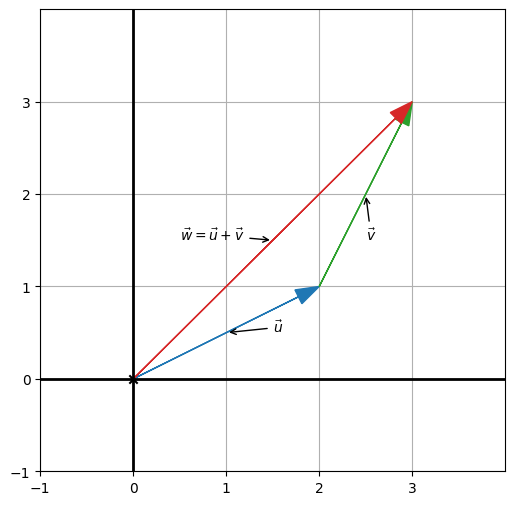

In [16]:
from vec2d.graph import Arrow, Colors, draw, Annotation
from vec2d.math import add, scale

u = (2, 1)
v = (1, 2)
w = add(u, v)

draw(
    Arrow(u, color=Colors.BLUE),
    Annotation(tip=scale(0.5, u), tail=(1.5, 0.5), text=r"$ \vec{u} $"),
    Arrow(w, u, color=Colors.GREEN),
    Annotation(tip=add(u, scale(0.5, v)), tail=(2.5, 1.5), text=r"$ \vec{v} $"),
    Arrow(w, color=Colors.RED),
    Annotation(tip=scale(0.5, w), tail=(0.5, 1.5), text=r"$ \vec{w} = \vec{u} + \vec{v} $"),

)

If we interpret the picture geometrically, in terms of the displacement vector, $ \vec{v} $ is the displacement between the vectors $ \vec{u} $ and $ \vec{w} $.

That can also be interpreted algebraically:

$
\vec{w} = \vec{u} + \vec{v} \\
\vec{v} = \vec{w} - \vec{u}
$


If we now have a look at the force field function, we see that it can be also written as a difference between vectors:

$ 
\vec{F}(x, y) = (-2 - x, 4 - y) = (-2, 4) - (x, y)
$

if we assimilate that formula to $ \vec{v} = \vec{w} - \vec{u} $ we can state that the force field $ \vec{F}(x, y) $ gives us the displacement vector between $ (-2, 4) $ and $ (x, y) $.

So the expectation is that the force field will be vectors pointing to $ (-2, 4) $, with their length increasing as we move away from $ (-2, 4) $ because the displacement vector will be larger.

Let's picture that with a few random vectors and confirm. We'll picture the displacement vector and the force field and confirm they match:


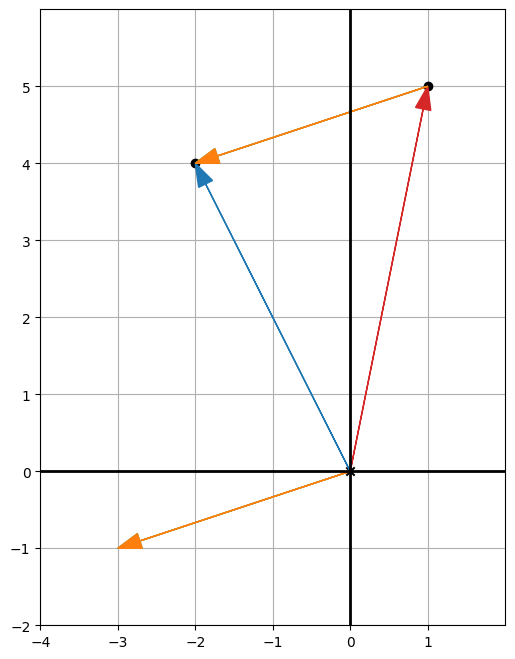

In [15]:
from vec2d.graph import Arrow, Colors, draw, Points
from vec2d.math import subtract, add

u = (-2, 4)
w = (1, 5)

def f(x, y):
    return (-2 - x, 4 - y)

draw(
    Points(u, w),
    Arrow(u, color=Colors.BLUE),
    Arrow(w, color=Colors.RED),
    Arrow(u, w, color=Colors.GREEN),
    Arrow(subtract(u, w), color=Colors.GREEN),
    Arrow(f(*w), color=Colors.ORANGE),
    Arrow(add(w, f(*w)), w, color=Colors.ORANGE),
)

See how the green vector is not completely overridden by the orange vector, which means that the displacement vector matches the force field.

Now we can use our `plot_vector_field()` function to confirm:

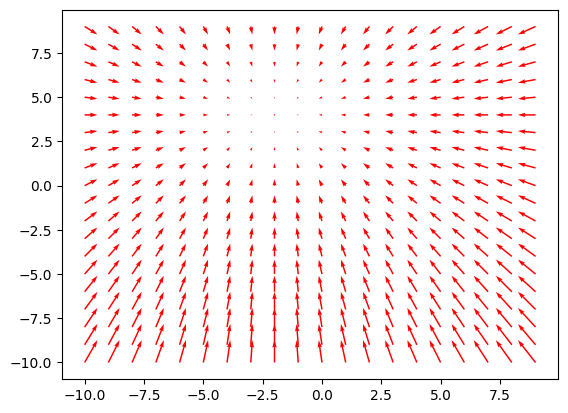

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_field(f, xmin, xmax, ymin, ymax, xtep=1, ystep=1):
    X, Y = np.meshgrid(np.arange(xmin, xmax, xtep), np.arange(ymin, ymax, ystep))
    U, V = f(X, Y)
    # same as:
    # U = np.vectorize(lambda x, y: f(x, y)[0])(X, Y)
    # V = np.vectorize(lambda x, y: f(x, y)[1])(X, Y)
    plt.quiver(X, Y, U, V, color='red')


def f(x, y):
    return (-2 - x, 4 - y)

plot_vector_field(f, -10, 10, -10, 10)

### Exercise

Suppose we have two black holes, both having gravity 0.1, and positioned at $ (-3, 4) $ and $ (2, 1) $ respectively.

The gravitational fields are $ \vec{g}_1(x, y) = 0.1 \cdot (-3 - x, 4 - y) $ and $ \vec{g}_2(x, y) = 0.1 \cdot (2 - x, 1 - y) $.

Calculate a formula for the total gravitational field $ \vec{g}(x, y) $ due to both black holes. Is it equivalent to a single black hole? If so, why?

At every position $ (x, y) $, an object with mass $ m $ will feel two gravitational forces:

$
m \cdot \vec{g}_1(x, y)
$

and 

$
m \cdot \vec{g}_2(x, y)
$

The vector sum of these forces will be:

$
m \cdot \vec{g}_1(x, y) + m \cdot \vec{g}_2(x, y) \\
= m \cdot (\vec{g}_1(x, y) + \vec{g}_2(x, y))
$

That is, it will be equivalent as a single black hole $ \vec{g}(x, y) = \vec{g}_1(x, y) + \vec{g}_2(x, y) $.

We can compute this total gravitational field:

$
\vec{g}(x, y) = \vec{g}_1(x, y) + \vec{g}_2(x, y) = 0.1 \cdot (-3 - x, 4 - y) + 0.1 \cdot (2 - x, 1 - y) \\
= 0.1 \cdot (-3 - x + 2 - x, 4 - y + 1 - y) \\
= 0.1 \cdot (-1 - 2x, 5 - 2y) \\
= 0.2 \cdot (-0.5 - x, 2.5 - y)
$

Therefore, the two black holes positioned in $ (-3, 4) $ and $ (2, 1) $ are equivalent to a single black hole positioned at $ (-0.5, 2.5) $.

### Exercise

In the asteroids game, add two black holes and allow these to feel each other's gravity. Then move while these both exert gravity on the asteroids and the spaceship.

You can find the solution in [Asteroid: force field with multiple black holes](../../02_mini-projects/28-asteroids_force-field-multi-black-holes/)

You can compare with the previous example to understand the code changes.

## Introducing potential energy

Vector fields, including gravitational fields, often arise as results of the calculus operation called the gradient, which is a critical tool in many areas (including AI).

The basic mental model consists of broadening our perspective, and instead of picturing gravity as a force vector that pulls objects towards a source at every point, we need to think of it as a surface (e.g., a bowl) on which objects move on it like marbles. These marbles might roll back and forth, but they are always pulled back towards the bottom of the bowl as they roll away.

A potential energy function essentially defines the shape of this bowl.

![Force field depiction as a surface](pics/depiction_of_force_field_as_surface.png)

We'll write potential energy as a function, taking a point $ (x, y) $ and returning a single number representing the gravitational potential energy at the point $ (x, y) $.

Using our bowl mental model, the potential energy function will give us the height of the bowl at a given point.

Apart from the visualization used above (a 3D representation of the surface), we can also use a heatmap and a contour map.

![Force field: heatmap](pics/heatmap.png)

![Force field: contour](pics/force_field_contour.png)

### Defining a potential energy scalar field

A scalar field is a function that takes $ (x, y) $ as inputs returns an scalar instead of a vector.

For example, $ U(x, y) = \frac{1}{2} \cdot (x^2 + y^2) $ defines an scalar field.

The following diagram illustrates how the scalar field is used:

![Scalar field](pics/scalar_field.png)

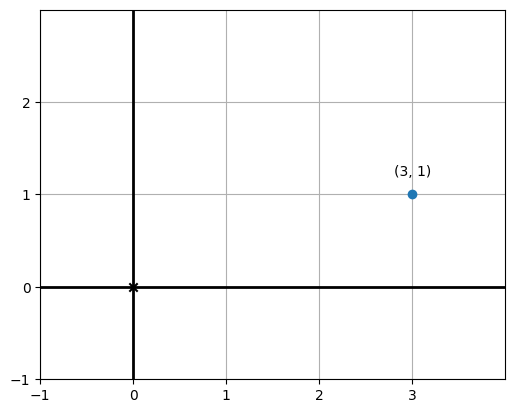

u(3, 1)=5.0


In [9]:
from vec2d.graph import draw, Points, Colors, Annotation

draw(
    Points((3, 1), color=Colors.BLUE),
    Annotation(tip=(2.8, 1.2), text=f"(3, 1)", arrowstyle=None),
)

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

print(f"{u(3, 1)=}")



The function $ U(x, y) $ turns out to be the potential energy function corresponding to the vector field $ \vec{F}(x, y) = (-x, -y) $.

One way to picture $ U(x, y) $ is to draw a 3D plot where $ z = U(x, y) $.

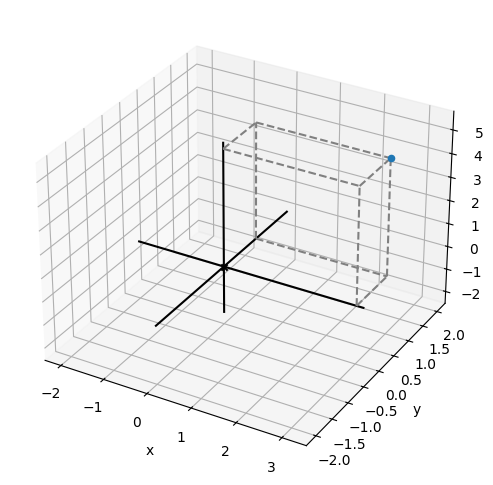

In [3]:
from vec3d.graph import draw3d, Points3D, Colors3D, Box3D

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

draw3d(
    Points3D((3, 1, u(3, 1)), color=Colors3D.BLUE),
    Box3D(3, 1, u(3, 1)),
)

Ploting a point for every single value of $ (x, y) $ will give us a surface representing the scalar field, and how it varies over the plane.

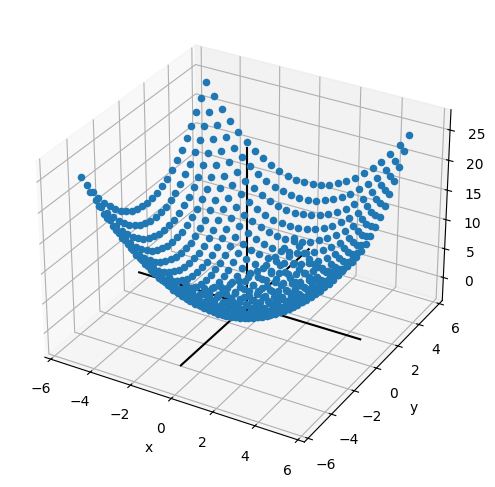

In [5]:
import numpy as np
from vec3d.graph import draw3d, Points3D, Colors3D

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

xs = np.linspace(-5, 5, 25)
ys = np.linspace(-5, 5, 25)

draw3d(
    Points3D(*[(x, y, u(x, y)) for x in xs for y in ys], color=Colors3D.BLUE),
)

Obviously, we can get a better picture using Matplotlib 3D charts:

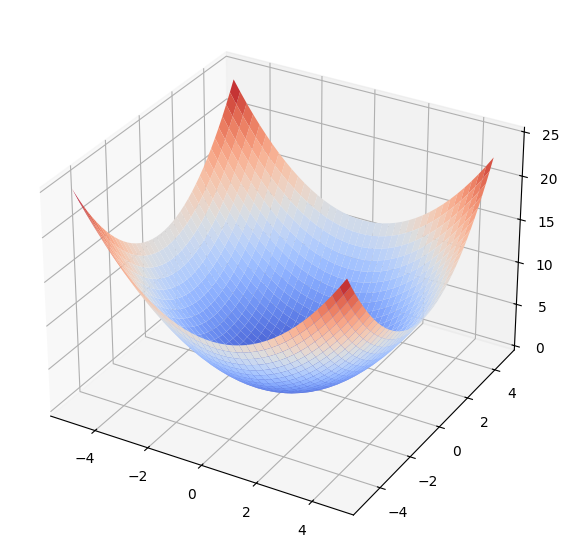

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

def plot_scalar_field(f, xmin, xmax, ymin, ymax, xstep=0.25, ystep=0.25, color=None, cmap="coolwarm", alpha=1, antialiased=True):
    fig = plt.figure()
    fig.set_size_inches(7, 7)
    ax = plt.axes(projection="3d")

    fv = np.vectorize(f)
    xs = np.arange(xmin, xmax, xstep)
    ys = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(xs, ys)
    Z = fv(X, Y)
    ax.plot_surface(X, Y, Z, cmap=cmap, color=color, alpha=alpha, edgecolor="none", antialiased=antialiased)

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

plot_scalar_field(u, -5, 5, -5, 5)


This means that our mental model that takes gravity as a surface in which objects move like marbles is not that far fetched.

We'll see soon that this potential energy function gives the same model of gravity as the vector field $ \vec{F}(x, y) = (-x, -y) $.

In any case, by looking at the picture above we can say:
> the potential energy increases as the distance from the origin increases. 

We can see that because, in all radial directions, the height of the graph increases, meaning the value of $ U $ increases.

### Plotting a scalar field as a heatmap

Alternatively, we can visualize the value of $ U(x, y) $ using a color scheme in 2D, instead of a z-coordinate in 3D. This requires us to include a color legend on the side so that we can see the approximate scalar value of $ U $ at any given point $ (x, y) $.

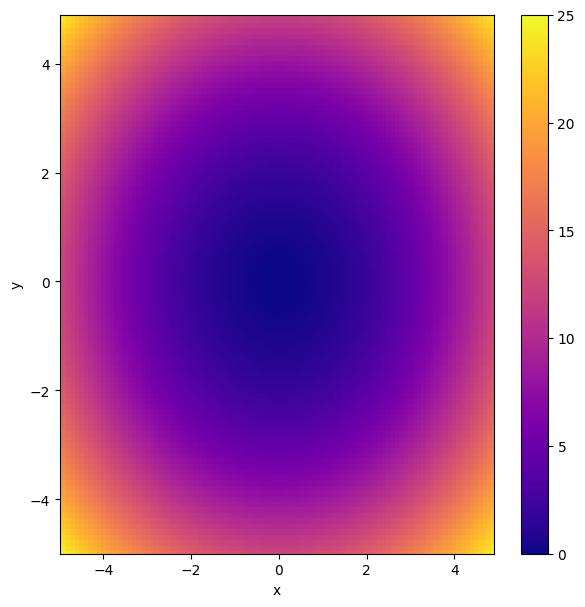

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scalar_field_heatmap(f, xmin, xmax, ymin, ymax, xstep=0.1, ystep=0.1):
    fv = np.vectorize(f)
    xs = np.arange(xmin, xmax, xstep)
    ys = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(xs, ys)
    Z = fv(X, Y)

    fig, ax = plt.subplots()
    c = ax.pcolormesh(X, Y, Z, cmap="plasma")
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    fig.set_size_inches(7, 7)
    plt.xlabel("x")
    plt.ylabel("y")

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

plot_scalar_field_heatmap(u, -5, 5, -5, 5)


See how the color is darker near $ (0, 0) $ meaning that the values of $ U(x, y) $ are lower. Toward the edges, the color is lighter, meaning the values of $ U(x, y) $ are higher.

### Plotting a scalar field as a contour map

A contour map is similar to a heatmap but uses a sort of topographical lines to represent the values of the scalar map in a 2D chart. In such maps, you find lines where the elevation is constant (meaning that you neither walk uphill nor downhill).

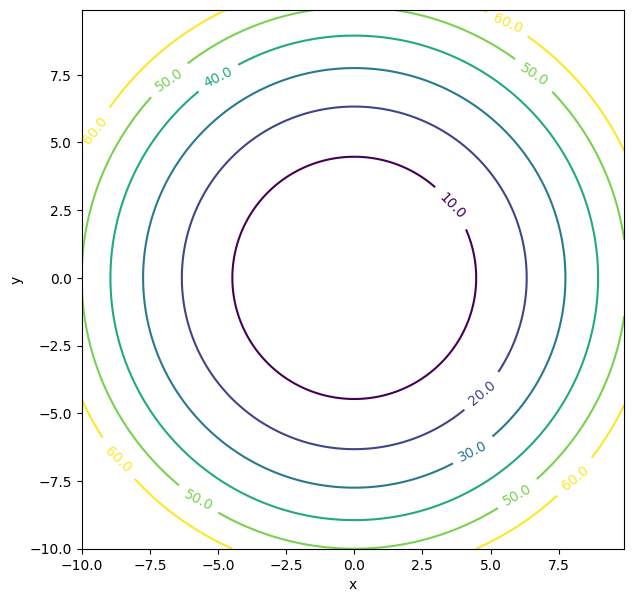

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scalar_field_contour(f, xmin, xmax, ymin, ymax, levels=None):
    # fig = plt.figure()


    fv = np.vectorize(f)
    xs = np.arange(xmin, xmax, 0.1)
    ys = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(xs, ys)
    Z = fv(X, Y)

    fig, ax = plt.subplots()
    cs = ax.contour(X, Y, Z, levels=levels)
    ax.clabel(cs, inline=1, fontsize=10, fmt="%1.1f")
    plt.xlabel("x")
    plt.ylabel("y")
    fig.set_size_inches(7, 7)

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

plot_scalar_field_contour(u, -10, 10, -10, 10, levels=[10, 20, 30, 40, 50, 60])


## Connecting energy and forces with the gradient

The notion of steepness is important &mdash; the steepness of a potential energy function tells us how much energy an object has to exert to move in that direction.

As you expect, the exterion required to move in a given direction is a measure of the force in the opposite direction.

In this section, we will deal with a quantitative version of the previous statement.

The **gradient** is an operation that takes a scalar field like potential energy and produces a vector field like a gravitational field.

At every location $ (x, y) $ in the plane, the gradient vector field at that location points in the direction of fastest increase in the scalar field.

Taking the gradient of a scalar field $ U(x, y) $ requires taking a derivative of $ U $ with respect to $ x $, and, separately, taking a derivative with respect to $ y $.

We'll be able to show that the gradient of the potential energy we've been working on $ U(x, y) = \frac{1}{2} \cdot (x^2 + y^2) $ is $ -\vec{F}(x, y) = (-x, -y) $, that is, the gravitational field we implemented in our asteroids game.

### Measuring steepness with cross sections

There's one more way of visualizing the function $ U(x, y) $ that makes it easy to see how steep it is at various points.

Let's focus on a specific point: $ (x, y) = (-5, 2).

If we locate it in the countour map, we see that it falls between $ U = 10 $ and $ U = 20 $.

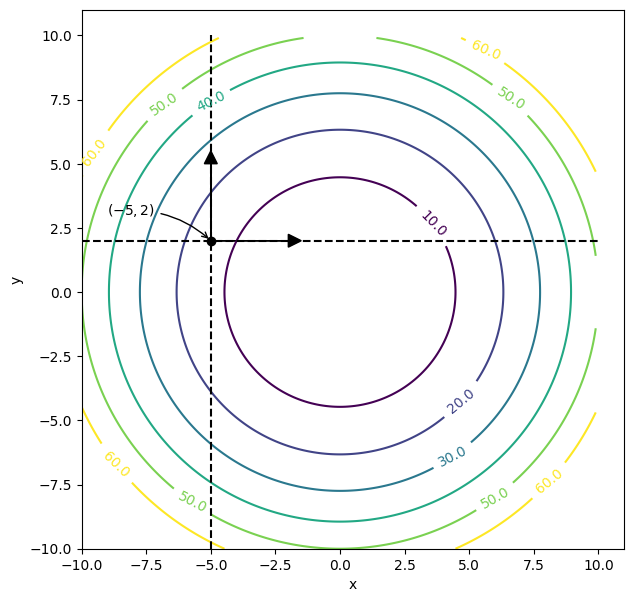

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scalar_field_contour(f, xmin, xmax, ymin, ymax, levels=None):
    # fig = plt.figure()


    fv = np.vectorize(f)
    xs = np.arange(xmin, xmax, 0.1)
    ys = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(xs, ys)
    Z = fv(X, Y)

    fig, ax = plt.subplots()
    cs = ax.contour(X, Y, Z, levels=levels)
    ax.clabel(cs, inline=1, fontsize=10, fmt="%1.1f")
    plt.xlabel("x")
    plt.ylabel("y")
    fig.set_size_inches(7, 7)

    plt.scatter(-5, 2, color="black")
    plt.plot([-10, 10], [2, 2], color="black", linestyle="--")
    plt.plot([-5, -5], [-10, 10], color="black", linestyle="--")
    plt.arrow(-5, 2, 3, 0, head_width=0.5, head_length=0.5, fc='black', ec='black')
    plt.arrow(-5, 2, 0, 3, head_width=0.5, head_length=0.5, fc='black', ec='black')
    plt.annotate(r"$ (-5, 2) $", xytext=(-9, 3), xy=(-5, 2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

plot_scalar_field_contour(u, -10, 10, -10, 10, levels=[10, 20, 30, 40, 50, 60])


The picture shows that the steepness of $ U(x, y) $ depends on the direction.

We can picture this by plotting the cross sections of $ U(x, y) $ where $ x = -5 $, and $ y = 2 $. These cross sections are slices of the graph $ U(x, y) $ at fixed values of $ x $ or $ y $.

For example, the following plot shows the cross section of $ U(x, y) $ at $ x = -5 $.

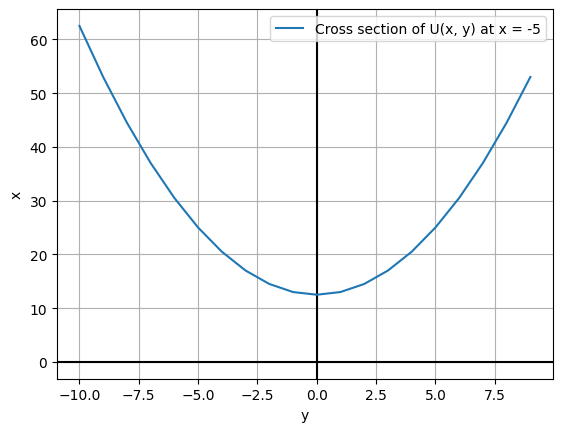

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def cross_section_u(y):
    """Cross section of U(x, y) at x = -5"""
    return (1 / 2) * ((-5) **2 + y ** 2)

y_min = -10
y_max = 10
ys = np.arange(y_min, y_max)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("y")
ax.set_ylabel("U(-5, y)")
# ax.set_xlim(t_min - (t_max - t_min) * dt, t_max + (t_max - t_min) * dt)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(ys, [cross_section_u(y) for y in ys], label=cross_section_u.__doc__)

ax.legend()
plt.show()


There's also a cross section in the $ y $ direction at $ (-5, 2) $.

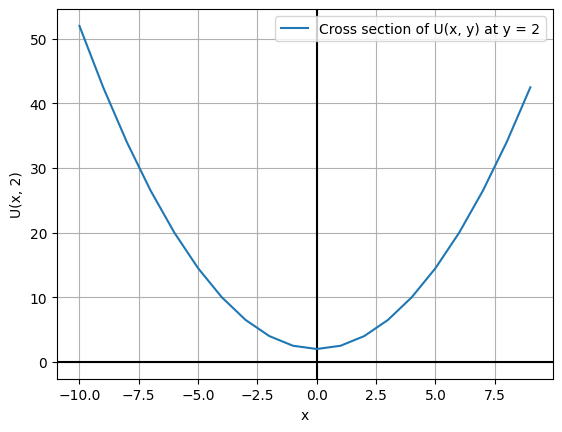

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def cross_section_u(x):
    """Cross section of U(x, y) at y = 2"""
    return (1 / 2) * (x ** 2 + (2) ** 2)

x_min = -10
x_max = 10
xs = np.arange(x_min, x_max)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("U(x, 2)")
# ax.set_xlim(t_min - (t_max - t_min) * dt, t_max + (t_max - t_min) * dt)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(xs, [cross_section_u(x) for x in xs], label=cross_section_u.__doc__)

ax.legend()
plt.show()


Together, these cross sections tell us how U is changing at $ (-5, 2) $, in both the $ x $ and $ y $ directions.

For example, the slope of $ U(x, 2) $ at $ x = -5 $ is negative, which tells us that moving in the $ x+ $ direction from $ (-5, 2) $ will cause the potential energy function to decrease.

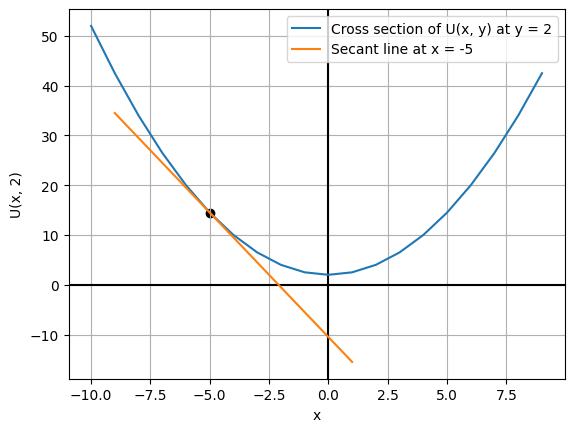

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_secant_line

def cross_section_u(x):
    """Cross section of U(x, y) at y = 2"""
    return (1 / 2) * (x ** 2 + (2) ** 2)

x_min = -10
x_max = 10
xs = np.arange(x_min, x_max)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("U(x, 2)")
# ax.set_xlim(t_min - (t_max - t_min) * dt, t_max + (t_max - t_min) * dt)

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(xs, [cross_section_u(x) for x in xs], label=cross_section_u.__doc__)
ax.scatter(-5, cross_section_u(-5), color="black")

secant_line = fn_secant_line(cross_section_u, -5.01, -4.99)
xs = np.arange(-9, 2)
ax.plot(xs, [secant_line(x) for x in xs], label="Secant line at x = -5")

ax.legend()
plt.show()


Similarly, because the slope of $ U(-5, y) $ at $ y = 2 $ is positive, we can derive that moving in the $ y+ $ direction from $ (-5, 2) $ will cause $ U $ to increase.

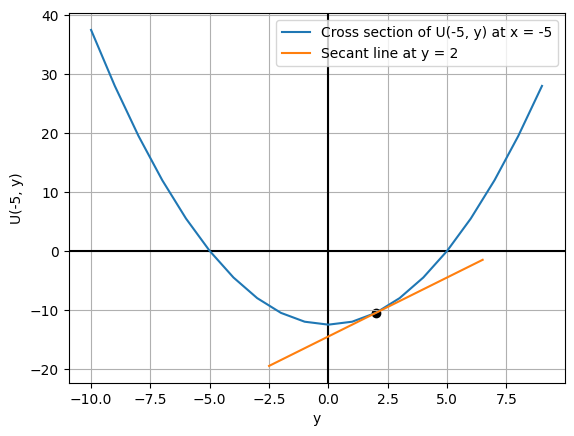

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lines import fn_secant_line

def cross_section_u(y):
    """Cross section of U(-5, y) at x = -5"""
    return (1 / 2) * (-5 ** 2 + y ** 2)

y_min = -10
y_max = 10
ys = np.arange(y_min, y_max)

fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlabel("y")
ax.set_ylabel("U(-5, y)")

ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

ax.plot(ys, [cross_section_u(y) for y in ys], label=cross_section_u.__doc__)
ax.scatter(2, cross_section_u(2), color="black")

secant_line = fn_secant_line(cross_section_u, 1.99, 2.01)
ys = np.arange(-2.5, 7.5)
ax.plot(ys, [secant_line(y) for y in ys], label="Secant line at y = 2")

ax.legend()
plt.show()


We haven't found the slope of the scalar field $ U(x, y) $ at thist point, but we have found what we could call the slope in the $ x $ direction and the slope in the $ y $ direction.

These values are called the *partial derivatives* of $ U $.

### Calculating partial derivatives

We already have the tools to find the previous slopes because both $ U(-5, y) $ and $ U(x, 2) $ are functions of one variable, so you could approximate their derivatives by calculating the scope of small secant lines.

For example, if we want to find the partial derivative of $ U(x, y) $ with respect to $ x $ at the point $ (-5, 2) $ we're asking for the slope of $ U(x, 2) $ at $ x = -5 $.

That is, we want to know how fast $ U(x, y) $ is changing in the $ x $ direction at the point $ (x, y) = (-5, 2) $.

We can calculate that by doing:

$
\displaystyle
\frac{U(-5 + \Delta x, 2) - U(-5, 2)}{\Delta x}
$

where $ \Delta x $ are small values.

And we can also calculate the derivative exactly for $ U(x, 2) $ as we've worked out the formulas previously:

As $ U(x, y) = \frac{1}{2} (x^2 + y^2) $

$
U(x, 2) = \frac{1}{2} (x^2 + 2^2) = \frac{1}{2} (x^2 + 4) \\
= \frac{x^2}{2} + 2
$

Thus, the derivative of $ U(x, 2) $ with respect to $ x $ will be $ \frac{2 \cdot x}{2} + 0 $, that is $ x $. Therefore, the derivative at $ x = -5 $ will be $ -5 $.

Note that in both the approximation and the exact symbolic derivative process, the variable $ y $ doesn't appear.

This is to be expected because when we're thinking about a partial derivative in the $ x $ direction, $ y $ isn't changing.

The general way to calculate partial derivatives symbolically is to take the derivative as if only one symbol (say $ x $) is a variable, while all the other symbols (like $ y $) are constants.

Using this method, we can say that the partial derivative of $ U(x, y) = \frac{1}{2} (x^2 + y^2) $ with respect to $ x $ is $ x $ and the partial derivative with respect to $ y $ is $ y $.

If we recall from previous chapter, the derivative of a function of one variable $ f(x) $ can be written as both:

$
\displaystyle
f'(x) \equiv \frac{df}{dx}
$

The right hand side of the formula is reminiscent of the slope formula $ \frac{\Delta f}{\Delta x} $ and it is more explicit than $ f'(x) $ because it indicates that we're taking the derivative with respect to $ x $.

We can use a similar notation for partial derivatives and write:

$
\displaystyle
\frac{\partial U}{\partial x}
$

for the partial derivative of $ U $ with respect to $ x $ and:

$
\displaystyle
\frac{\partial U}{\partial y}
$

for the partial derivative of $ U $ with respect to $ y $.

Therefore, for $ U(x, y) = \frac{1}{2} (x^2 + y^2) $:

$
\displaystyle
\frac{\partial U}{\partial x} = x
$

$
\displaystyle
\frac{\partial U}{\partial y} = y
$


Here's another example, if $ q(x, y) = x \cdot sin(xy) + y $ we can say:

$
\displaystyle
\frac{\partial q}{\partial x} = sin(xy) + xy \; cos(xy)
$

$
\displaystyle
\frac{\partial q}{\partial y} = x^2 cos(xy) + 1
$

Those derivatives has been calculated applying the chain rule and the composition rule:

| Name | Formula |
| :--- | :------ |
| Chain rule | $ (f(g(x)))' = f'(g(x)) \cdot g(x) $ |
| Product rule | $ (f(x) + g(x))' = f'(x) \cdot g(x) + f(x) \cdot g'(x) $ |
| Sum rule/linear combination | $ (a \cdot f(x) + b \cdot g(x))' = a \cdot f'(x) + b \cdot g'(x) $ |
| Power rule (generic) | $ (a \cdot f(x)^n)' = a \cdot f(x)^{n-1} \cdot f'(x) $ |
| Power rule (linear) | $ (a \cdot x^n + b)' = a \cdot n \cdot x^{n-1} $ |
| Derivative of a constant | $ a' = 0 $ |
| Derivative of sine | $ (sin(x))' = cos(x) $ |
| Derivative of cosine | $ (cos(x))' = -sin(x) $ |
| Derivative of exponential | $ (e^x)' = e^x $ |
| Derivative of exponential (base $ a $) | $ (a^x)' = ln(a) \cdot a^x $ |
| Derivative of natural logarithm | $ \displaystyle (ln(x))' = \frac{1}{x} $ |
| Derivative of base $ a $ logarithm | $ \displaystyle (log_a(x))' = \frac{1}{ln(a) \cdot x} $|


Let's see in detail how are those calculated:

$
\displaystyle
\frac{\partial x \cdot sin(xy) + y}{\partial x} \\
= \frac{\partial x \cdot sin(xy)}{\partial x} \\
= sin(xy) \cdot  \frac{\partial x}{\partial x} + x \cdot \frac{\partial sin(xy)}{\partial x} \\
= sin(xy) + x \cdot (cos(xy) \cdot \frac{\partial xy}{\partial x}) \\
= sin(xy) + xy \cdot cos(xy)
$

And for the other partial derivative is similar:

$
\displaystyle
\frac{\partial x \cdot sin(xy) + y}{\partial y} \\
= \frac{\partial x \cdot sin(xy)}{\partial y} + 1 \\
= x \cdot cos(xy) \cdot x + 1 \\
= x^2 \cdot cos(xy) + 1
$

### Finding the steepness of a graph with the gradient

If we zoom in on the point $ (-5, 2) $ on the graph of $ U(x, y) $ we can see that just as any smooth function $ f(x) $ looks like a straight line on a sufficiently small range of $ x $ values, the graph of a smooth scalar field looks like a plane in a small enough vicinity of the $ x $, $ y $ plane.

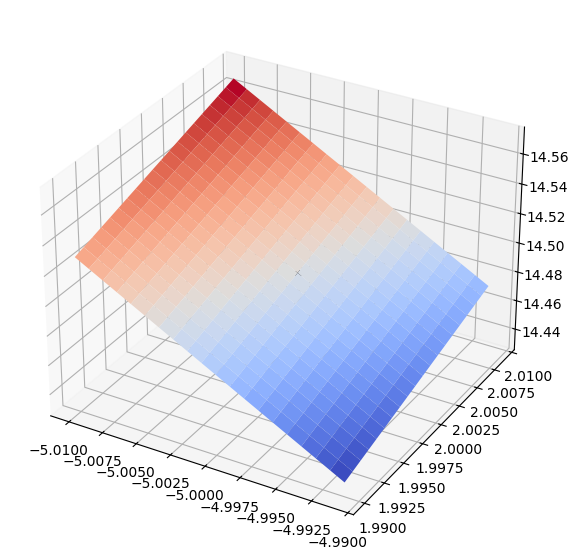

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

def plot_scalar_field(f, xmin, xmax, ymin, ymax, xstep=0.001, ystep=0.001, color=None, cmap="coolwarm", alpha=1, antialiased=True):
    fig = plt.figure()
    fig.set_size_inches(7, 7)
    ax = plt.axes(projection="3d")

    fv = np.vectorize(f)
    xs = np.arange(xmin, xmax, xstep)
    ys = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(xs, ys)
    Z = fv(X, Y)
    ax.plot_surface(X, Y, Z, cmap=cmap, color=color, alpha=alpha, edgecolor="none", antialiased=antialiased)
    ax.scatter(-5, 2, f(-5, 2), color="black")

def u(x, y):
    return (1 / 2) * (x **2 + y ** 2)

plot_scalar_field(u, -5.01, -4.99, 1.99, 2.01)


Just as the derivative $ df/dx $ tells us about the slope of the line that approximates $ f(x) $ at a given point, the partial derivatives $ \partial U / \partial x $ and $ \partial U / \partial y $ tell us about a plane that approximates $ U(x, y) $ at a given point.

The dotted lines in the diagram below show the $ x $ and $ y $ cross sections of $ U(x, y) $ at this point. In this window, they are approximately straight lines, and their slopes in the $ x $, $ z $ and $ y $, $ z $ planes are close to the partial derivatives $ \partial U / \partial x $ and $ \partial U / \partial y $.

![approximating_plane](pics/approximating_plane.png)

Suppose there is a plane that best approximates $ U(x, y) $ near $ (-5, 2) $.

The partial derivatives tell us how much it is slanted in the $ x $ and $ y $ directions. 

In a plane, there will be a direction you could walk without gaining or losing elevation. That is, a line in the plane that is parallel to the $ x $, $ y $ plane.

In our $ U $ function that happens to be the $ (2, 5) $ direction:

![parallel line to x, y](pics/parallel_line_to_xy.png)

The walker on the plane will have an easy time going on that direction because they will not be climbing or descending.

However, if the walker turns 90° to the left, they would be walking uphill in the steepest direction possible. That would be the direction $ (-5, 2) $ which is perpendicular to $ (2, 5) $.

The direction of the steepest ascent happens to be a vector whose components are the partial derivatives of $ U $ at a given point.

For a function $ U(x, y) $, the vector of its partial derivatives is called its **gradient** and it is written as $ \nabla U $.

$
\displaystyle
\nabla U(x, y) = (\frac{\partial U}{\partial x}, \frac{\partial U}{\partial y})
$

Because we have formulas for the partial derivatives, we can conclude that in our case, $ \nabla U(x, y) = (x, y) $.

The function $ \nabla U $ which is the gradient of $ U $ is an assignment of a vector to every point in the plane, so it is a vector field.

The plot of $ \nabla U $ shows us at every point $ (x, y) $ which is the direction uphill of the graph of $ U(x, y) $, as well as how steep it is.

We can use Python to plot that vector field:

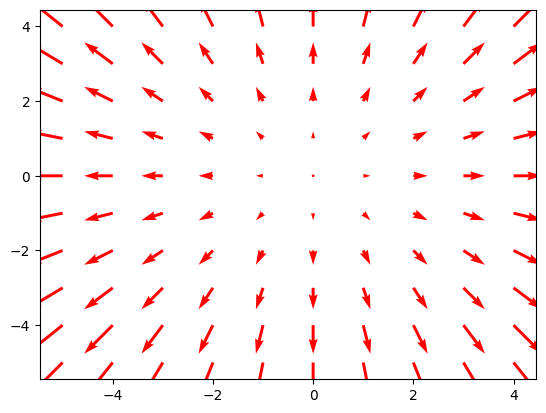

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_field(f, xmin, xmax, ymin, ymax, xtep=1, ystep=1):
    X, Y = np.meshgrid(np.arange(xmin, xmax, xtep), np.arange(ymin, ymax, ystep))
    U, V = f(X, Y)
    # same as:
    # U = np.vectorize(lambda x, y: f(x, y)[0])(X, Y)
    # V = np.vectorize(lambda x, y: f(x, y)[1])(X, Y)
    plt.quiver(X, Y, U, V, color='red')


def f(x, y):
    return (x, y)

plot_vector_field(f, -5, 5, -5, 5)

Thus, the gradient $ \nabla U $ is a vector field telling us the magnitude and direction of steepest ascent on the graph of $ U $ at any point $ (x, y) $.

Therefore, the gradient is a way of connecting a scalar field with a vector field. It turns out that this gives the connection between potential energy and force.

### Calculating force fields from potential energy with the gradient